# Los Angeles Crime Analysis

Using the crimes dataset deterime the following:
1. The frequency of crimes by the hour of their occurence.
2. The area with the most night crime.
3. Deterime the number of crimes committed against people ages: 0-17, 18-25, 26-34, 35-44, 45-54, 55-64,65+

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read file and create dataframe
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


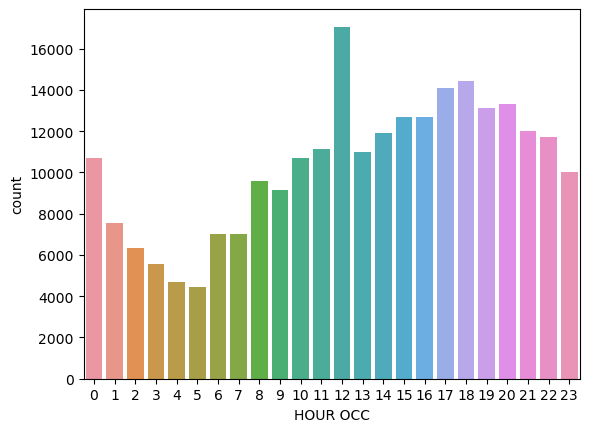

The peak crime hour is: 12


In [2]:
# Frequencies of crimes by the hour of occurence
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
sns.countplot(x="HOUR OCC", data=crimes)
plt.show()
peak_crime_hour=12
print("The peak crime hour is: " + str(peak_crime_hour))

In [3]:
# Determine the area with the most night crime
night_hours = [12,13,14,15,16,17,18,19,20,21,22,23]
night_crimes=crimes[crimes["HOUR OCC"].isin(night_hours)]

night_crimes_area=night_crimes.groupby("AREA NAME")["HOUR OCC"].count().sort_values(ascending=False)
df_NCA=night_crimes_area.reset_index(name="COUNT")

peak_night_crime_location=df_NCA["AREA NAME"].iloc[0]
print("The area with the most night crimes is: " + peak_night_crime_location)

The area with the most night crimes is: Central


In [4]:
# Determine number of crimes commed against specific age groups
labels=["0-17","18-25","26-34","35-44","45-54","55-64","65+"]
bins=[0,17,25,34,44,54,64,np.inf]
crimes["Age Bracket"]=pd.cut(crimes["Vict Age"],labels=labels,bins=bins)
victim_ages=crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64
